# STAT Project- Group 17: Project Title

##### Authors: Andy Zuo, Lia Yang, Helen Tan

In [1]:
make_plots = 1
plottype = "png"

import pandas as pd
import numpy as np
from numpy import set_printoptions
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV

#pd.__version__ #'1.5.3'
#np.__version__ #'1.23.5'
#sns.__version__ #'0.12.2'

#from tools import readligo as rl

from tools import utils

## Exploratory Data Analysis(EDA)

### Data Cleaning - add more data cleaning

In [2]:
crime_data = pd.read_csv('data/crime.csv')

In [3]:
crime_data.shape

(1954, 53)

In [4]:
crime_data.describe()

,person_id,sex,age_at_current_charge,age_at_first_charge,p_charges,p_incarceration,p_probation,p_juv_fel_count,p_felprop_viol,p_murder,...,drug_two_year,property_two_year,misdemeanor_two_year,felony_two_year,violent_two_year,drug_six_month,property_six_month,misdemeanor_six_month,felony_six_month,violent_six_month
count,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,...,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,3260.150461,0.871546,31.971853,23.956499,11.228762,0.351586,0.967247,0.112590,0.996929,0.017400,...,0.093142,0.089560,0.272262,0.176049,0.209826,0.039918,0.050154,0.125384,0.089048,0.084442
std,1900.758354,0.334681,11.008898,8.868941,11.223027,0.477588,1.481047,0.708095,2.217787,0.174411,...,0.290706,0.285623,0.445238,0.380959,0.407289,0.195817,0.218318,0.331238,0.284886,0.278121
min,4.000000,0.000000,18.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1576.250000,1.000000,23.000000,18.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3291.000000,1.000000,29.000000,20.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4952.500000,1.000000,39.000000,27.000000,14.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6468.000000,1.000000,69.000000,60.000000,218.000000,1.000000,16.000000,14.000000,29.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
crime_data.head()

,person_id,screening_date,sex,race,age_at_current_charge,age_at_first_charge,p_charges,p_incarceration,p_probation,p_juv_fel_count,...,drug_two_year,property_two_year,misdemeanor_two_year,felony_two_year,violent_two_year,drug_six_month,property_six_month,misdemeanor_six_month,felony_six_month,violent_six_month
0,1001,2014-02-03,1,African-American,45,19,39,1,3,0,...,0,0,0,0,0,0,0,0,0,0
1,101,2013-01-13,1,Hispanic,42,26,9,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,101,2014-02-02,1,Hispanic,43,26,15,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1015,2014-01-22,1,African-American,35,19,47,1,3,0,...,0,0,0,0,0,0,0,0,0,0
4,1016,2013-04-15,1,Other,27,18,11,1,2,0,...,0,0,0,1,1,0,0,0,1,1


In [6]:
crime_data.isnull().sum()

person_id                0
screening_date           0
sex                      0
race                     0
age_at_current_charge    0
age_at_first_charge      0
p_charges                0
p_incarceration          0
p_probation              0
p_juv_fel_count          0
p_felprop_viol           0
p_murder                 0
p_felassault             0
p_misdeassault           0
p_famviol                0
p_sex_offense            0
p_weapon                 0
p_fta_two_year           0
p_fta_two_year_plus      0
current_violence         0
current_violence20       0
p_pending_charge         0
p_felony                 0
p_misdemeanor            0
p_violence               0
total_convictions        0
p_arrest                 0
p_property               0
p_traffic                0
p_drug                   0
p_dui                    0
p_domestic               0
p_stalking               0
p_voyeurism              0
p_fraud                  0
p_stealing               0
p_trespass               0
s

In [7]:
crime_data.dtypes

person_id                 int64
screening_date           object
sex                       int64
race                     object
age_at_current_charge     int64
age_at_first_charge       int64
p_charges                 int64
p_incarceration           int64
p_probation               int64
p_juv_fel_count           int64
p_felprop_viol            int64
p_murder                  int64
p_felassault              int64
p_misdeassault            int64
p_famviol                 int64
p_sex_offense             int64
p_weapon                  int64
p_fta_two_year            int64
p_fta_two_year_plus       int64
current_violence          int64
current_violence20        int64
p_pending_charge          int64
p_felony                  int64
p_misdemeanor             int64
p_violence                int64
total_convictions         int64
p_arrest                  int64
p_property                int64
p_traffic                 int64
p_drug                    int64
p_dui                     int64
p_domest

### Data visualization - Add more visualizations based on the two assumption at Main.ipynb and add description for each visualization such as purpose and the visualization anaylysis, and findings.

#### Heatmap

In [8]:
crime_data = crime_data.drop('p_famviol', axis = 1)
correlation = crime_data.corr().round(2)
print(correlation['total_convictions'].sort_values(ascending = False),'\n')

total_convictions        1.00
p_misdemeanor            0.89
p_arrest                 0.89
p_pending_charge         0.86
p_charges                0.83
p_felony                 0.81
p_probation              0.64
p_drug                   0.62
p_violence               0.59
p_property               0.54
p_stealing               0.49
p_felprop_viol           0.47
p_trespass               0.42
p_incarceration          0.37
p_traffic                0.33
p_felassault             0.28
age_at_current_charge    0.23
p_juv_fel_count          0.21
p_weapon                 0.19
felony_two_year          0.16
general_two_year         0.15
one_year                 0.12
violent_two_year         0.12
three_year               0.12
p_misdeassault           0.12
p_dui                    0.11
general_six_month        0.11
property_two_year        0.10
five_year                0.09
sex                      0.09
drug_two_year            0.08
felony_six_month         0.08
six_month                0.08
property_s

/tmp/ipykernel_16906/2983602702.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = crime_data.corr().round(2)


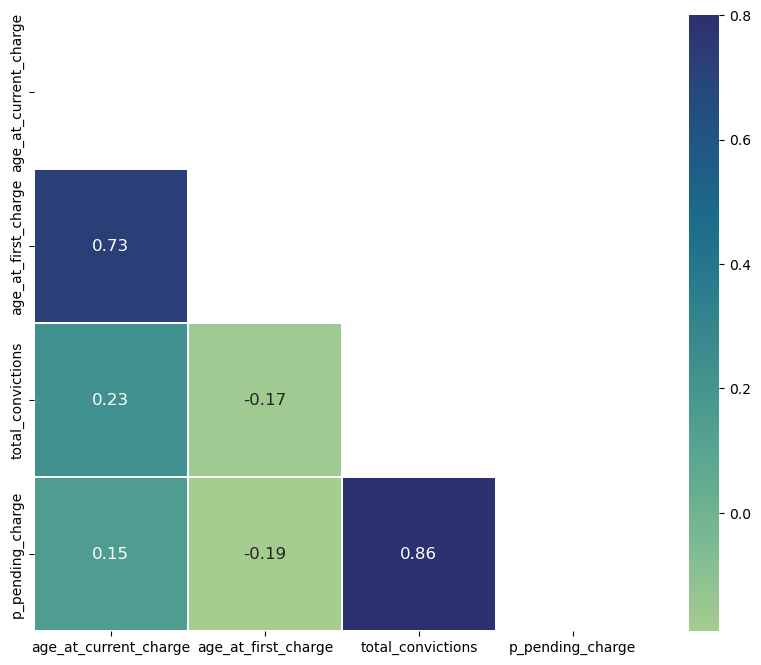

<Figure size 640x480 with 0 Axes>

In [9]:
cols = ["age_at_current_charge", "age_at_first_charge", "total_convictions", "p_pending_charge"]
cm = np.corrcoef(crime_data[cols].values.T)
mask = np.triu(np.ones((4,4)))
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm.round(2), mask=mask, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='crest',
            linecolor="white", xticklabels=cols, annot_kws={'size': 12}, yticklabels=cols)
plt.show()
plt.savefig('heatmap.'+plottype)

#### Histogram - Age and crime

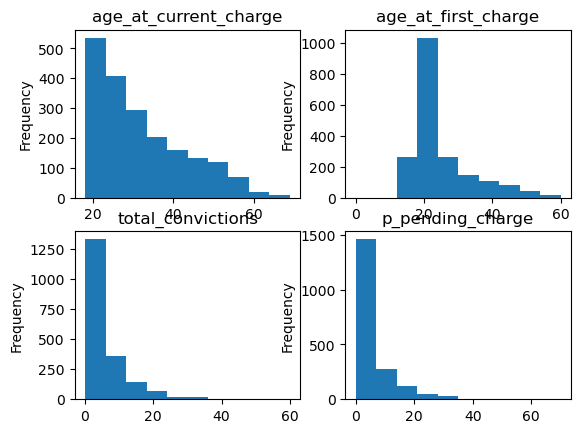

In [10]:
hist_features = ["age_at_current_charge", "age_at_first_charge", "total_convictions", "p_pending_charge"]

for k, feature in enumerate(hist_features):
    plt.subplot(2, 2, k + 1)
    plt.title(feature)
    crime_data[feature].plot(kind="hist")
plt.show()

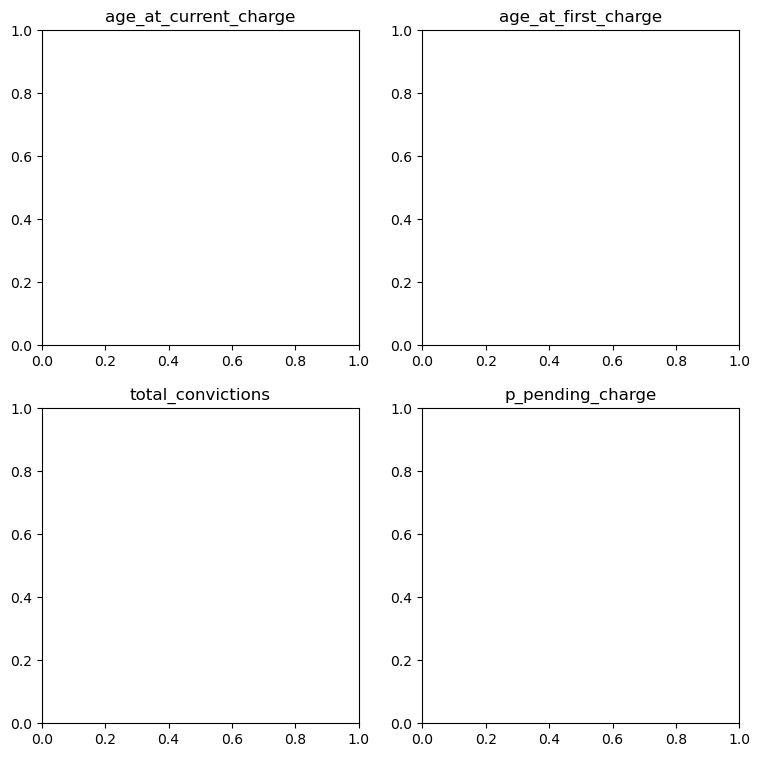

In [11]:
fig, axes = plt.subplots(figsize=(9,9), ncols=2, nrows=2)

hist_features = ["age_at_current_charge", "age_at_first_charge", "total_convictions", "p_pending_charge"]

for k, feature in enumerate(hist_features):
    axes[k//2, k%2].set_title(feature)
    

In [12]:
9%2

1

Purpose: To see whether or not the age features and commitment features have long tails.

Finding: Age features have no long tails, total_convictions and p_pending charge have longer tails.

According to the preceding Figure, the long tails of total_convictions and p_pending_charge will be corrected in the feature engineering section.

## Feature Engineer - try to understand the future engineer do, and try to add some more feature engine that is useful for random forest model

Feature engineering is the process of selecting, extracting, and transforming raw data into features that can be used to train a machine learning model. The goal of feature engineering is to improve the accuracy and efficiency of a model by creating meaningful representations of the input data.

#### split screening_date to year, month and day

In [13]:
screening_date = pd.to_datetime(crime_data.screening_date)
crime_data["year"] = screening_date.dt.year
crime_data["month"] = screening_date.dt.month
crime_data["day"] = screening_date.dt.day
crime_data.drop(labels='screening_date', axis=1, inplace=True)

In [14]:
crime_data.head(5)

,person_id,sex,race,age_at_current_charge,age_at_first_charge,p_charges,p_incarceration,p_probation,p_juv_fel_count,p_felprop_viol,...,felony_two_year,violent_two_year,drug_six_month,property_six_month,misdemeanor_six_month,felony_six_month,violent_six_month,year,month,day
0,1001,1,African-American,45,19,39,1,3,0,3,...,0,0,0,0,0,0,0,2014,2,3
1,101,1,Hispanic,42,26,9,1,0,0,0,...,0,1,0,0,0,0,0,2013,1,13
2,101,1,Hispanic,43,26,15,1,0,0,1,...,0,0,0,0,0,0,0,2014,2,2
3,1015,1,African-American,35,19,47,1,3,0,3,...,0,0,0,0,0,0,0,2014,1,22
4,1016,1,Other,27,18,11,1,2,0,3,...,1,1,0,0,0,1,1,2013,4,15


#### Convert string features to integer

In [15]:
crime_data.race.head(20)

0     African-American
1             Hispanic
2             Hispanic
3     African-American
4                Other
5                Other
6             Hispanic
7     African-American
8             Hispanic
9     African-American
10    African-American
11    African-American
12    African-American
13           Caucasian
14    African-American
15    African-American
16    African-American
17    African-American
18    African-American
19           Caucasian
Name: race, dtype: object

In [16]:
race_dict = crime_data['race'].unique().tolist()
crime_data['race'] = crime_data['race'].apply(lambda x: race_dict.index(x))

In [17]:
crime_data.race.head(20)

0     0
1     1
2     1
3     0
4     2
5     2
6     1
7     0
8     1
9     0
10    0
11    0
12    0
13    3
14    0
15    0
16    0
17    0
18    0
19    3
Name: race, dtype: int64

#### Convert long tail distribution to normal distribution by log transformation.

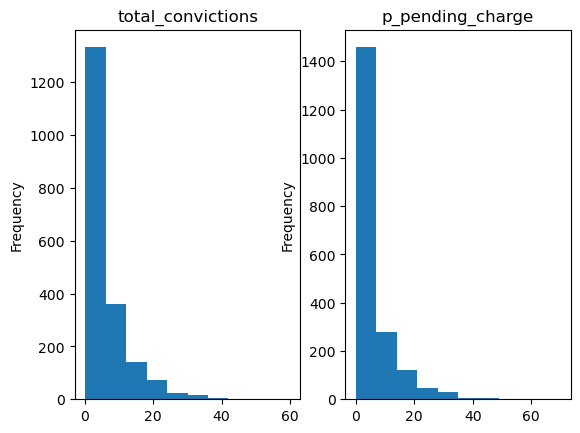

<Figure size 640x480 with 0 Axes>

In [18]:
#Figures before log trans
hist_features = [ "total_convictions", "p_pending_charge"]
for k, feature in enumerate(hist_features):
    plt.subplot(1, 2, k + 1)
    plt.title(feature)
    crime_data[feature].plot(kind="hist")
plt.show()
plt.savefig('figure.'+plottype)

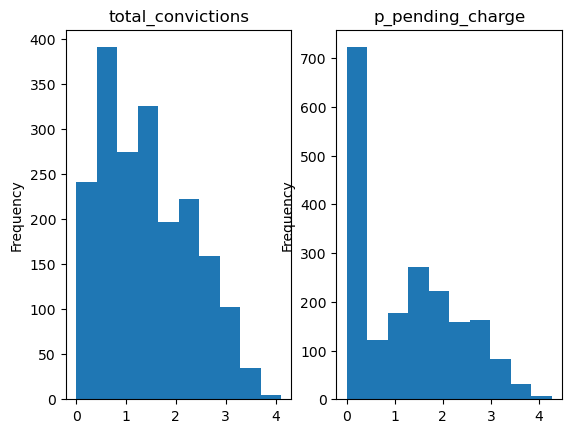

<Figure size 640x480 with 0 Axes>

In [19]:
# figures after log transform
crime_data["total_convictions"] = np.log(crime_data["total_convictions"].values + 1)
crime_data["p_pending_charge"] = np.log(crime_data["p_pending_charge"].values + 1)
hist_features = [ "total_convictions", "p_pending_charge"]
for k, feature in enumerate(hist_features):
    plt.subplot(1, 2, k + 1)
    plt.title(feature)
    crime_data[feature].plot(kind="hist")
plt.show()
plt.savefig('figure1.'+plottype)

#### Feature choosing: 1. Remove features with low standard deviation

In [20]:
label_columns = ["general_two_year", "general_six_month", "drug_two_year", "property_two_year", "misdemeanor_two_year",
                 "felony_two_year", "violent_two_year", "drug_six_month", "property_six_month", "misdemeanor_six_month",
                 "felony_six_month", "violent_six_month"]

features_columns = crime_data.columns.tolist()
x = utils.prepare_features(crime_data, label_columns, features_columns)

In [21]:
# #Original cell
# label_columns = ["general_two_year", "general_six_month", "drug_two_year", "property_two_year", "misdemeanor_two_year",
#                  "felony_two_year", "violent_two_year", "drug_six_month", "property_six_month", "misdemeanor_six_month",
#                  "felony_six_month", "violent_six_month"]
# drop_features = ["person_id"] + label_columns
# features_columns = crime_data.columns.tolist()
# for x in drop_features:
#     features_columns.remove(x)
# x = crime_data.loc[:, features_columns]

In [22]:
print(x.std())

sex                       0.334681
race                      1.379372
age_at_current_charge    11.008898
age_at_first_charge       8.868941
p_charges                11.223027
p_incarceration           0.477588
p_probation               1.481047
p_juv_fel_count           0.708095
p_felprop_viol            2.217787
p_murder                  0.174411
p_felassault              0.957249
p_misdeassault            1.014631
p_sex_offense             0.516139
p_weapon                  0.632346
p_fta_two_year            0.598511
p_fta_two_year_plus       0.098334
current_violence          0.499363
current_violence20        0.255402
p_pending_charge          1.100237
p_felony                  3.290550
p_misdemeanor             4.294165
p_violence                3.323527
total_convictions         0.904258
p_arrest                  6.246491
p_property                4.150365
p_traffic                 0.602952
p_drug                    3.691064
p_dui                     0.998764
p_domestic          

In [23]:
## choose top 35 features with higher sd
select_feature_num = np.argsort(x.std().values)[::-1][:35]
print(x.std())
select_feature = x.columns[select_feature_num]
drop_features = list(set(features_columns).difference(set(select_feature)))
print(drop_features)  # print removed features
x = x.loc[:, select_feature]

sex                       0.334681
race                      1.379372
age_at_current_charge    11.008898
age_at_first_charge       8.868941
p_charges                11.223027
p_incarceration           0.477588
p_probation               1.481047
p_juv_fel_count           0.708095
p_felprop_viol            2.217787
p_murder                  0.174411
p_felassault              0.957249
p_misdeassault            1.014631
p_sex_offense             0.516139
p_weapon                  0.632346
p_fta_two_year            0.598511
p_fta_two_year_plus       0.098334
current_violence          0.499363
current_violence20        0.255402
p_pending_charge          1.100237
p_felony                  3.290550
p_misdemeanor             4.294165
p_violence                3.323527
total_convictions         0.904258
p_arrest                  6.246491
p_property                4.150365
p_traffic                 0.602952
p_drug                    3.691064
p_dui                     0.998764
p_domestic          

In [24]:
print(x.std()) # sd of features keeped

p_charges                11.223027
age_at_current_charge    11.008898
age_at_first_charge       8.868941
day                       8.534939
p_arrest                  6.246491
p_misdemeanor             4.294165
p_property                4.150365
p_stealing                3.833058
p_drug                    3.691064
month                     3.678154
p_violence                3.323527
p_felony                  3.290550
p_felprop_viol            2.217787
p_trespass                1.800541
p_probation               1.481047
race                      1.379372
p_voyeurism               1.335258
p_pending_charge          1.100237
p_misdeassault            1.014631
p_dui                     0.998764
p_felassault              0.957249
total_convictions         0.904258
p_juv_fel_count           0.708095
p_weapon                  0.632346
p_traffic                 0.602952
p_fta_two_year            0.598511
p_sex_offense             0.516139
one_year                  0.500124
current_violence    

#### Feature selecting: 2. remove sparse features

In [25]:
feature_sparse_r = 0.9 # if the percentage of zeros is larger than 0.9 then remove.

# def remove_sparse_features(data, feature_r):
#     x = data
#     x_num = x.shape[0]
#     feature_num = x.shape[1]
#     feature_no_zero_num = np.sum([x == 0], 1)[0]
#     feature_list =  feature_no_zero_num / x_num
#     select_feature_sparse = x.columns[feature_list < feature_r]
#     drop_feature_sparse = x.columns[feature_list > feature_r]
#     x = x.loc[:, select_feature_sparse]
#     return feature_list, x, drop_feature_sparse

feature_sparse_r_list, x, drop_feature_sparse  = utils.remove_sparse_features(x, feature_sparse_r)
print(feature_sparse_r_list)
print(feature_sparse_r_list < feature_sparse_r)
print(drop_feature_sparse)

[0.00000000e+00 0.00000000e+00 5.11770727e-04 0.00000000e+00
 8.18833163e-03 2.04708291e-01 4.18116684e-01 4.77993859e-01
 4.19140225e-01 0.00000000e+00 4.12487206e-01 4.85158649e-01
 6.00818833e-01 6.71443193e-01 5.36335722e-01 5.75230297e-01
 9.97952917e-01 3.69498465e-01 6.00307062e-01 8.51074719e-01
 7.41555783e-01 1.23336745e-01 9.54452405e-01 8.98157625e-01
 9.26305015e-01 9.01740020e-01 9.89764585e-01 4.97952917e-01
 4.72364381e-01 6.48413511e-01 6.52507677e-01 2.28249744e-01
 0.00000000e+00 1.28454452e-01 1.13101331e-01]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True False  True
 False False False  True  True  True  True  True  True  True  True]
Index(['p_voyeurism', 'p_juv_fel_count', 'p_traffic', 'p_fta_two_year',
       'p_sex_offense'],
      dtype='object')


In [26]:
#Original cell

# x_num = x.shape[0]
# feature_num = x.shape[1]
# feature_no_zero_num = np.sum([x == 0], 1)[0]
# feature_sparse_r = 0.9 # if the percentage of zeros is larger than 0.9 then remove.
# feature_sparse_r_list =  feature_no_zero_num/x_num
# print(feature_sparse_r_list)
# print(feature_sparse_r_list < feature_sparse_r)
# # features kept
# select_feature_sparse = x.columns[feature_sparse_r_list < feature_sparse_r]
# # features removed
# drop_feature_sparse = x.columns[feature_sparse_r_list > feature_sparse_r]
# print(drop_feature_sparse)
# x = x.loc[:, select_feature_sparse]

#### Outliers detection

In [27]:
# find features with outliers
print(x.describe())
outlier_features_list = ["p_charges","p_arrest","p_misdemeanor",
                         "p_property","p_stealing","p_drug","p_violence","p_felony",
                         "p_felprop_viol","p_trespass","p_probation",
                         "p_misdeassault","p_dui","p_felassault","p_weapon"]



x = utils.remove_outliers(x, outlier_features_list)

         p_charges  age_at_current_charge  age_at_first_charge          day  \
count  1954.000000            1954.000000          1954.000000  1954.000000   
mean     11.228762              31.971853            23.956499    15.436540   
std      11.223027              11.008898             8.868941     8.534939   
min       2.000000              18.000000             0.000000     1.000000   
25%       4.000000              23.000000            18.000000     8.000000   
50%       8.000000              29.000000            20.000000    16.000000   
75%      14.000000              39.000000            27.000000    22.000000   
max     218.000000              69.000000            60.000000    31.000000   

          p_arrest  p_misdemeanor   p_property   p_stealing       p_drug  \
count  1954.000000    1954.000000  1954.000000  1954.000000  1954.000000   
mean      5.907881       3.303480     2.301433     1.961617     2.432446   
std       6.246491       4.294165     4.150365     3.833058 

In [28]:
# find features with outliers
# print(x.describe())
# outlier_features_list = ["p_charges","p_arrest","p_misdemeanor",
#                          "p_property","p_stealing","p_drug","p_violence","p_felony",
#                          "p_felprop_viol","p_trespass","p_probation",
#                          "p_misdeassault","p_dui","p_felassault","p_weapon"]
# # change the values of outliers.
# for feature in outlier_features_list:
#     feature_data = x[feature]
#     mean = x[feature].mean()
#     std = x[feature].std()
#     mean_3_std = mean + 3 * std
#     x.loc[x[feature] > mean_3_std, feature] = mean_3_std

In [29]:
x.describe()

,p_charges,age_at_current_charge,age_at_first_charge,day,p_arrest,p_misdemeanor,p_property,p_stealing,p_drug,month,...,total_convictions,p_weapon,one_year,current_violence,p_incarceration,six_month,three_year,year,sex,five_year
count,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,...,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,10.996687,31.971853,23.956499,15.436540,5.786629,3.205290,2.120191,1.788900,2.330484,5.126407,...,1.426610,0.141177,0.502047,0.527636,0.351586,0.347492,0.771750,2013.174514,0.871546,0.886899
std,9.619147,11.008898,8.868941,8.534939,5.781292,3.737095,3.186592,2.883842,3.242971,3.678154,...,0.904258,0.448368,0.500124,0.499363,0.477588,0.476296,0.419812,0.379648,0.334681,0.316798
min,2.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,0.000000,0.000000
25%,4.000000,23.000000,18.000000,8.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,...,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2013.000000,1.000000,1.000000
50%,8.000000,29.000000,20.000000,16.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,...,1.386294,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2013.000000,1.000000,1.000000
75%,14.000000,39.000000,27.000000,22.000000,7.000000,4.000000,3.000000,2.000000,3.000000,9.000000,...,2.079442,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2013.000000,1.000000,1.000000
max,44.897844,69.000000,60.000000,31.000000,24.647354,16.185976,14.752527,13.460790,13.505639,12.000000,...,4.110874,2.066435,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,1.000000,1.000000


## Models - Using Random Forest, determine the features that have the biggest influence on committing crime again

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
import random

In [31]:
random.seed(123456)
num = int(len(crime_data) * 0.7)
param_grid = {"n_estimators": [10,20,30,50,100], "max_depth": [1, 2, 3, 4, 5]}
n_estimators_len = len(param_grid["n_estimators"])
max_depth = len(param_grid["max_depth"])
cv = KFold(n_splits=2, shuffle=True, random_state=666)
label = label_columns[0]
train_x, train_y = x.loc[:num, :].values, crime_data.loc[:num, label].values
test_x, test_y = x.loc[num:, :].values, crime_data.loc[num:, label].values
    
model = RandomForestClassifier()
clf = GridSearchCV(estimator=model,
                   param_grid=param_grid,
                   scoring='accuracy',
                   cv=cv,
                   return_train_score=True)
clf.fit(train_x, train_y)

test_score = clf.cv_results_['mean_test_score'].reshape((n_estimators_len, max_depth))
print(test_score)

[[0.58918129 0.59649123 0.59283626 0.58991228 0.58625731]
 [0.60087719 0.59137427 0.60599415 0.60160819 0.60233918]
 [0.59429825 0.5994152  0.60453216 0.60453216 0.61111111]
 [0.59868421 0.59795322 0.58991228 0.60160819 0.61476608]
 [0.5869883  0.59649123 0.60964912 0.61038012 0.60964912]]


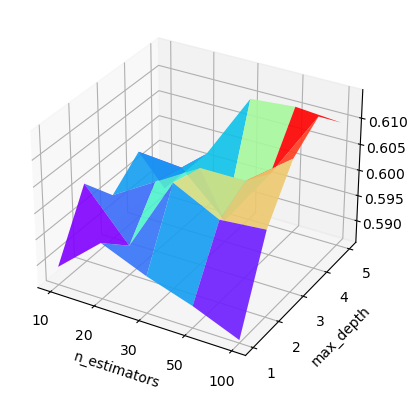

<Figure size 640x480 with 0 Axes>

In [32]:
x1 = np.arange(start=1, stop=n_estimators_len +1, step=1)
y1 = np.arange(start=1, stop=max_depth +1, step=1)

X1, Y1 = np.meshgrid(x1, y1)
Z1 = np.asarray(test_score)
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(X1,Y1,Z1,alpha=0.9, cstride=1, rstride = 1, cmap='rainbow')
plt.xticks(x1,param_grid["n_estimators"])
plt.xlabel('n_estimators')

plt.yticks(y1,param_grid["max_depth"])
plt.ylabel('max_depth')

plt.show()
plt.savefig('figure2.'+plottype)

In [33]:
train_x, train_y = x.loc[:num, :].values, crime_data.loc[:num, label].values
test_x, test_y = x.loc[num:, :].values, crime_data.loc[num:, label].values
clf = RandomForestClassifier(n_estimators=50, max_depth= 4)
clf.fit(train_x, train_y)
test_pred = clf.predict(test_x)
test_acc = accuracy_score(test_y, test_pred)
print("test acc{}".format(round(test_acc, 4)))

test acc0.6286


In [34]:
feature_names = x.columns[:-1] 
imporfeatures_rank = sorted(zip(feature_names, map(lambda x:round(x,4), clf.feature_importances_)),key=lambda x: x[1],reverse=True)

In [35]:
imporfeatures_rank

[('age_at_current_charge', 0.112),
 ('p_misdemeanor', 0.1093),
 ('p_charges', 0.0899),
 ('age_at_first_charge', 0.0848),
 ('p_arrest', 0.0799),
 ('three_year', 0.064),
 ('total_convictions', 0.0434),
 ('p_pending_charge', 0.0367),
 ('p_drug', 0.0345),
 ('one_year', 0.0345),
 ('day', 0.0315),
 ('p_dui', 0.0314),
 ('race', 0.0252),
 ('p_stealing', 0.025),
 ('p_felony', 0.0247),
 ('p_violence', 0.0229),
 ('p_probation', 0.0165),
 ('p_misdeassault', 0.0148),
 ('month', 0.0146),
 ('six_month', 0.0134),
 ('p_weapon', 0.0132),
 ('p_felprop_viol', 0.0131),
 ('p_property', 0.0123),
 ('sex', 0.0108),
 ('p_trespass', 0.0088),
 ('p_incarceration', 0.0078),
 ('p_felassault', 0.0074),
 ('year', 0.0029),
 ('current_violence', 0.0021)]

The outcome of our model predicted that age and number of prior misdemeanor are the features that will cause a person to commit another crime in the future. Higher number of prior misdemeanor will have higher chance to commit a crime again. And a younger age for a person committed his, her, or their first crime will have higher chance to commit a crime again in the future.